# Tail bound simulation of error matrix

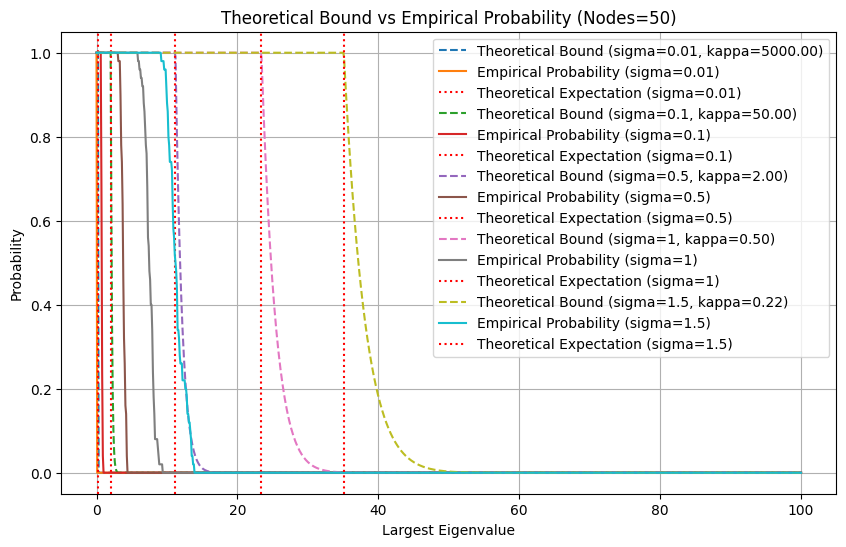

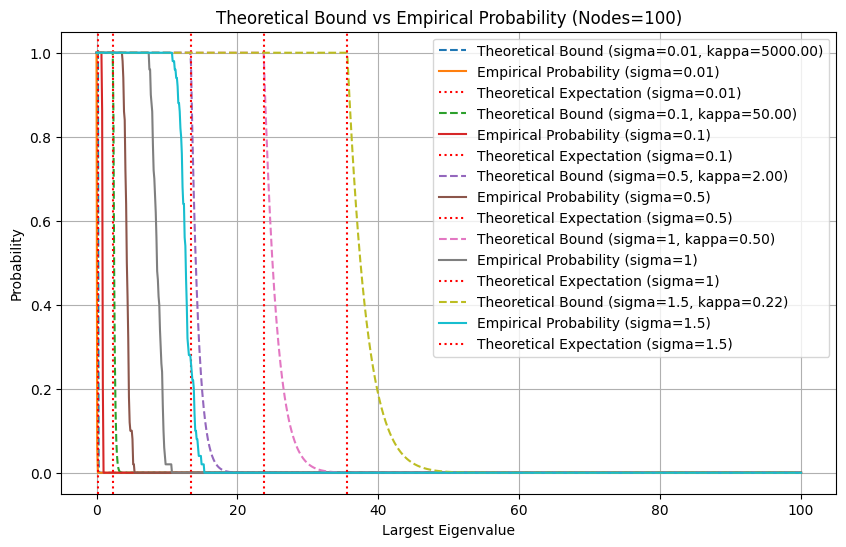

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, 2*largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree):
    return np.minimum((2 * 3 * num_nodes) * np.exp((-kappa * t**2) / (2 * degree)), 1)

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes, kappa, degree):
    return np.sqrt(2 * (degree/kappa) * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [50, 100]  # Different numbers of nodes to test
sigma_values = [0.01, 0.1, 0.5, 1, 1.5]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {sigma: [] for sigma in sigma_values}

    for sigma in sigma_values:
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[sigma].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    for sigma, values in results.items():
        kappa = 1 / (2 * sigma**2)
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = values[0][1]
        t_values = np.linspace(0, 100, 1000)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes, kappa, degree)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (sigma={sigma}, kappa={kappa:.2f})', linestyle='dashed')
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (sigma={sigma})', linestyle='solid')
        ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (sigma={sigma})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

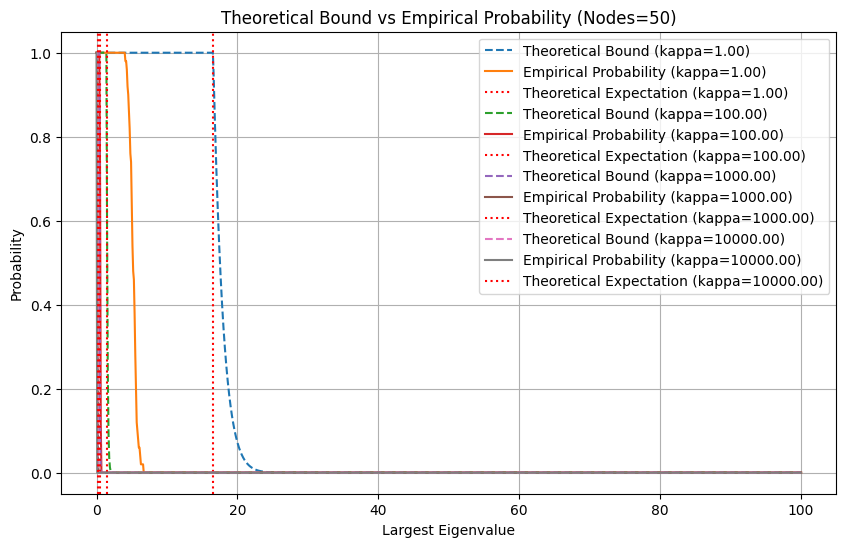

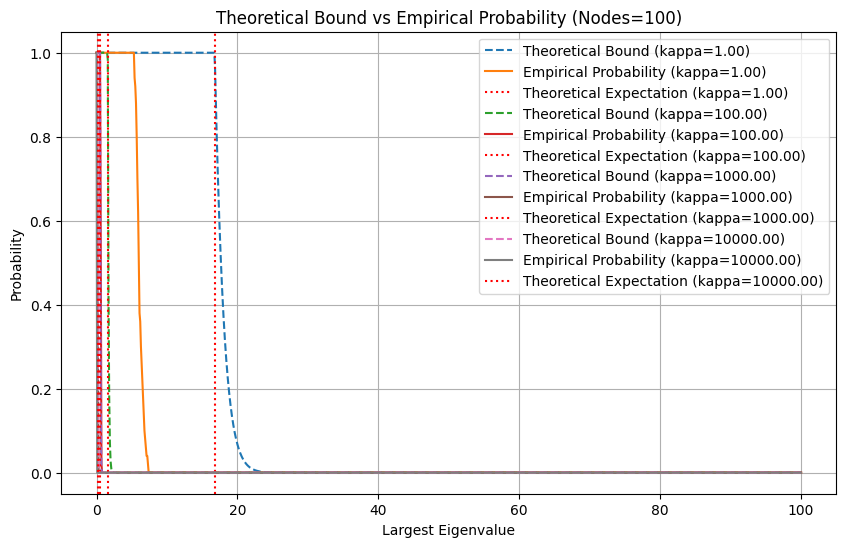

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, 2*largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree):
    return np.minimum((2 * 3 * num_nodes) * np.exp((-kappa * t**2) / (2 * degree)), 1)

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes, kappa, degree, edges_num):
    return np.sqrt(2 * (1.5 * edges_num * degree/kappa) * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [50, 100]  # Different numbers of nodes to test
kappa_values = [1, 100, 1000, 10000, 10000]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            edges_num = G.number_of_edges()
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    for kappa, values in results.items():
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = values[0][1]
        t_values = np.linspace(0, 100, 1000)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes, kappa, degree)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f})', linestyle='dashed')
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f})', linestyle='solid')
        ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (kappa={kappa:.2f})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

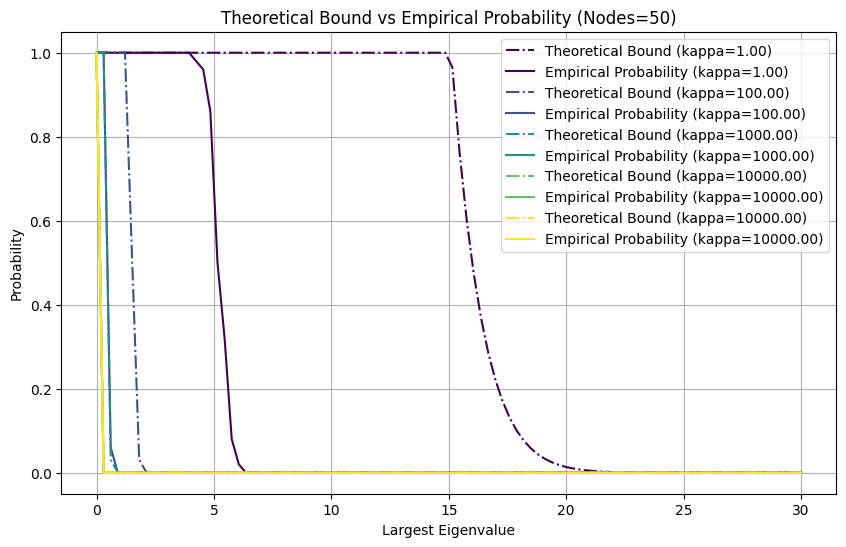

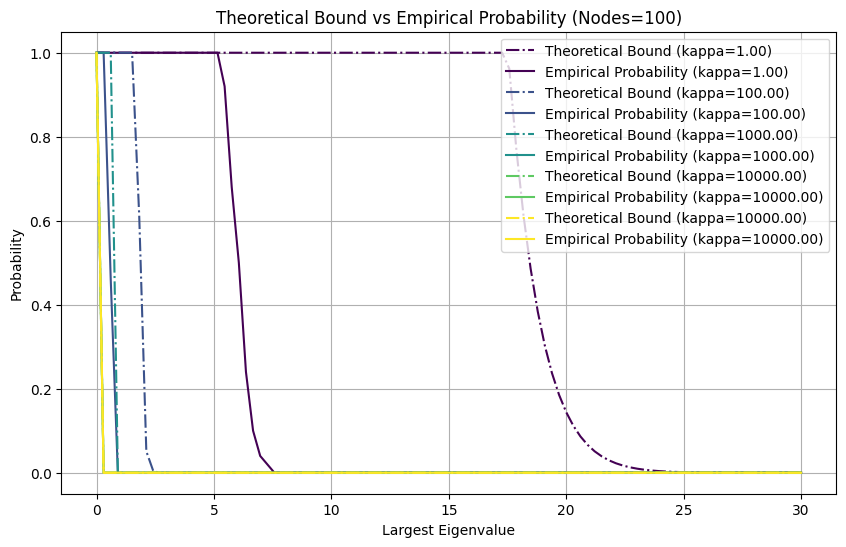

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, 2*largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree):
    return np.minimum((2 * 3 * num_nodes) * np.exp((-kappa * t**2) / (2 * degree)), 1)

# Parameters
num_nodes_list = [500]  # Different numbers of nodes to test
kappa_values = [1, 100, 1000, 10000, 10000]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))
    for kappa, color in zip(kappa_values, colors):
        values = results[kappa]
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = values[0][1]
        t_values = np.linspace(0, 30, 100)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f})', linestyle='dashdot', color=color)
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f})', linestyle='solid', color=color)

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, 2*largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree):
    return np.minimum((2 * 3 * num_nodes) * np.exp((-kappa * t**2) / (2 * degree)), 1)

# Parameters
num_nodes_list = [500]  # Different numbers of nodes to test
kappa_values = [1, 100, 1000]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))
    for kappa, color in zip(kappa_values, colors):
        values = results[kappa]
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = np.degrees(1 / np.sqrt(2 * kappa))
        t_values = np.linspace(0, 30, 100)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='dashdot', color=color)
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='solid', color=color)

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

KeyboardInterrupt: 

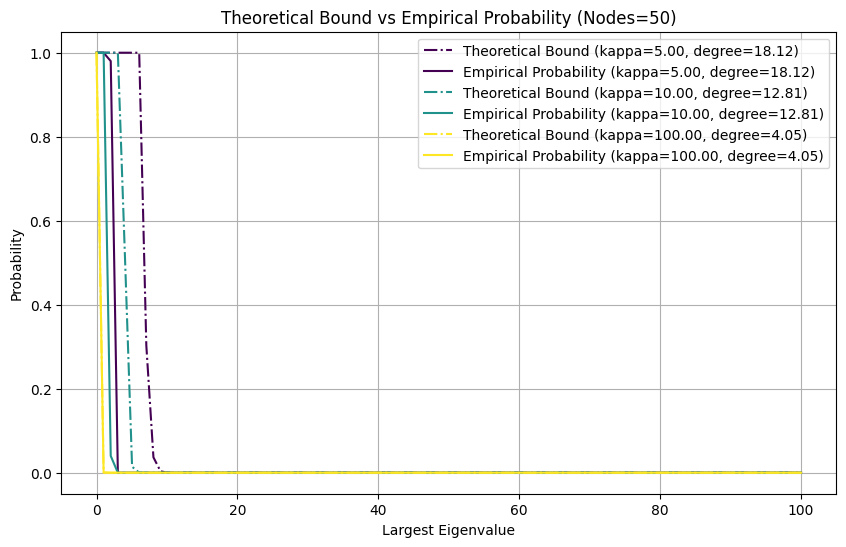

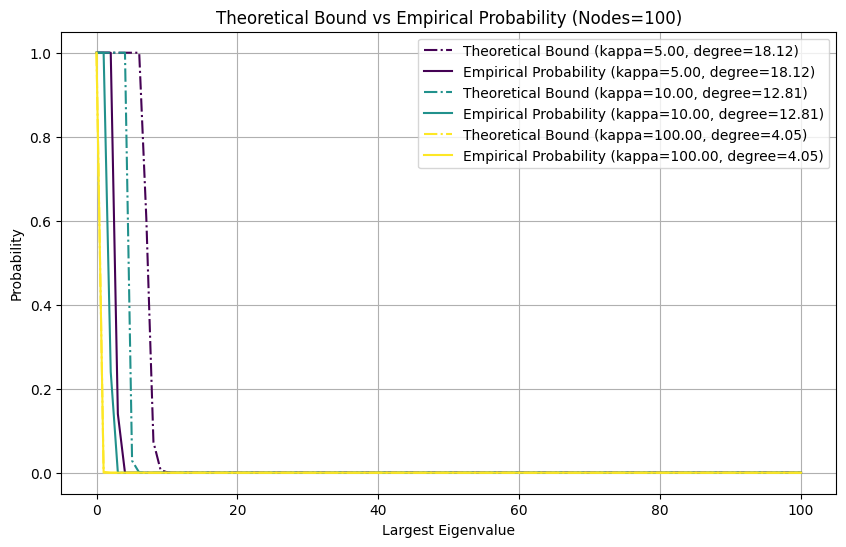

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree, edges_num):
    return np.minimum((2 * 3 * num_nodes) * np.exp((- t**2) / (2 * degree / kappa)), 1)

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes, kappa, degree, edges_num):
    return np.sqrt(2 * ( degree / kappa) * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [50, 100]  # Different numbers of nodes to test
kappa_values = [5, 10, 100]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            edges_num = G.number_of_edges()
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z, edges_num))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))
    for kappa, color in zip(kappa_values, colors):
        values = results[kappa]
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = np.degrees(1 / np.sqrt(2 * kappa))
        edges_num = values[0][2]
        t_values = np.linspace(0, 100, 100)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree, edges_num)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)
        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes, kappa, degree, edges_num)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='dashdot', color=color)
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='solid', color=color)
        # ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (kappa={kappa:.2f})')

    ax.set_xlabel('Largest Eigenvalue')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.show()

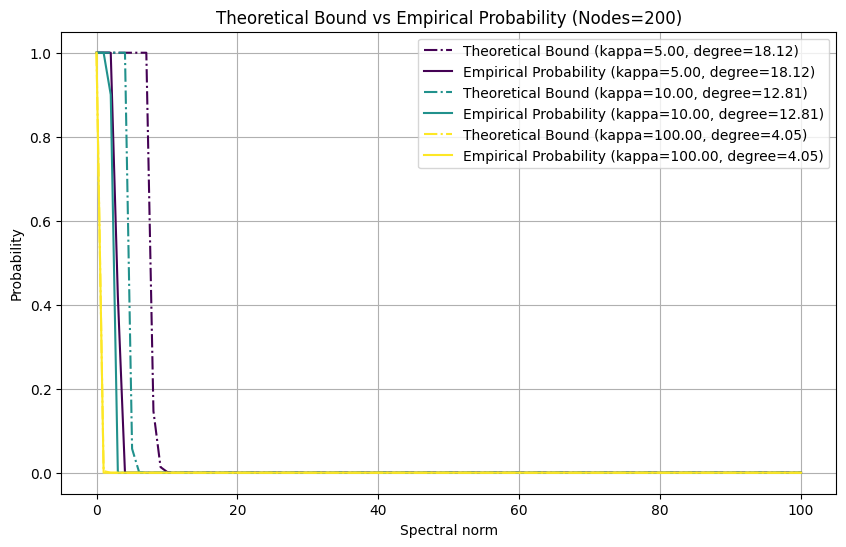

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree, edges_num):
    return np.minimum((2 * 3 * num_nodes) * np.exp((- t**2) / (2 * degree / kappa)), 1)

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes, kappa, degree, edges_num):
    return np.sqrt(2 * ( degree / kappa) * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [500]  # Different numbers of nodes to test
kappa_values = [5, 10, 100]
num_trials = 50

# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            edges_num = G.number_of_edges()
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z, edges_num))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))
    for kappa, color in zip(kappa_values, colors):
        values = results[kappa]
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = np.degrees(1 / np.sqrt(2 * kappa))
        edges_num = values[0][2]
        t_values = np.linspace(0, 100, 100)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree, edges_num)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)
        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes, kappa, degree, edges_num)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='dashdot', color=color)
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='solid', color=color)
        # ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (kappa={kappa:.2f})')

    ax.set_xlabel('Spectral norm')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    plt.savefig('/home/jason/DPGO/SE-Sync/python/pic/2.png', dpi=300, bbox_inches='tight')
    plt.show()

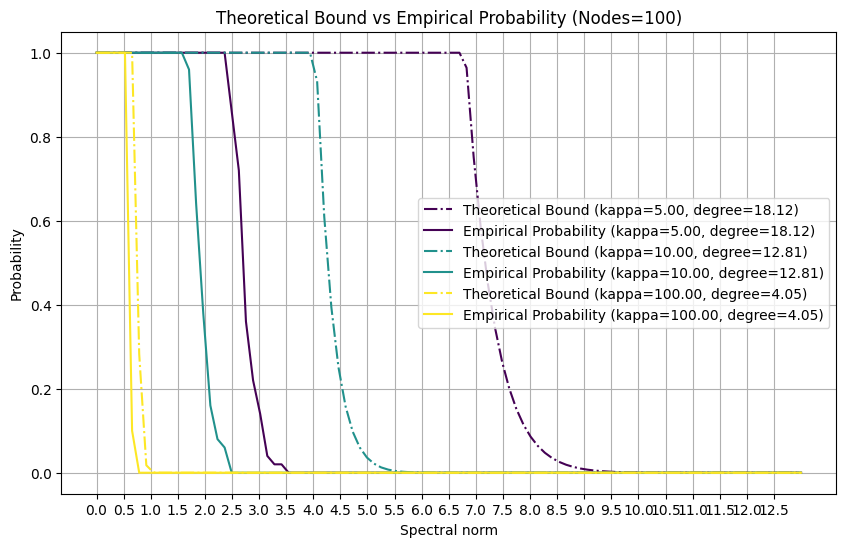

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3*i:3*(i+1), 3*j:3*(j+1)] = D_matrices[i][j]

    return kron_matrix

# Function to generate a sum of B matrices and compute operator norm
def generate_symmetric_matrix_sum(adj_matrix, sigma):
    S1 = np.array([[0,  0,  0], [0,  0, -1], [0,  1,  0]])
    S2 = np.array([[0,  0,  1], [0,  0,  0], [-1, 0,  0]])
    S3 = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  0]])

    n = adj_matrix.shape[0]
    sum_B = np.zeros((3 * n, 3 * n))
    edge_list = np.array(np.triu(adj_matrix).nonzero()).T

    for i, j in edge_list:
        phi = np.random.normal(0, sigma, 3)
        for B_block in [S1, S2, S3]:
            B = np.zeros((3 * n, 3 * n))
            B[3*i:3*(i+1), 3*j:3*(j+1)] = B_block
            B[3*j:3*(j+1), 3*i:3*(i+1)] = B_block.T
            sum_B += B @ B.T

    operator_norm = np.linalg.norm(sum_B, ord=2)
    largest_degree = max(dict(G.degree()).values())

    return operator_norm, largest_degree

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound
def theoretical_bound(t, num_nodes, vZ, kappa, degree, edges_num):
    return np.minimum((2 * 3 * num_nodes) * np.exp((- t**2) / (2 * degree / kappa)), 1)

# Function to compute theoretical expectation
def compute_theoretical_expectation(vZ, num_nodes, kappa, degree, edges_num):
    return np.sqrt(2 * ( degree / kappa) * np.log(2 * 3 * num_nodes))

# Parameters
num_nodes_list = [100]  # Different numbers of nodes to test
kappa_values = [5, 10, 100]
num_trials = 50



# Run experiments and collect results
for num_nodes in num_nodes_list:
    results = {kappa: [] for kappa in kappa_values}

    for kappa in kappa_values:
        sigma = np.sqrt(1 / (2 * kappa))
        for _ in range(num_trials):
            r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
            G = nx.random_geometric_graph(num_nodes, r)
            edges_num = G.number_of_edges()
            adj_matrix = nx.adjacency_matrix(G).todense()

            _, degree = generate_symmetric_matrix_sum(adj_matrix, sigma)
            V_z = degree
            kron_matrix = generate_kron_matrix(adj_matrix, sigma)
            largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
            results[kappa].append((largest_eigenvalue, V_z, edges_num))

    # Plot empirical distribution of largest eigenvalues
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))
    for kappa, color in zip(kappa_values, colors):
        values = results[kappa]
        eigenvalues = [v[0] for v in values]
        V_z = values[0][1]
        degree = np.degrees(1 / np.sqrt(2 * kappa))
        edges_num = values[0][2]
        t_values = np.linspace(0, 13, 100)
        bound_values = theoretical_bound(t_values, num_nodes, _ , kappa, degree, edges_num)
        empirical_probs = [np.mean(np.array(eigenvalues) >= t) for t in t_values]
        empirical_probs = np.array(empirical_probs) / np.max(empirical_probs)
        theoretical_expectation = compute_theoretical_expectation(V_z, num_nodes, kappa, degree, edges_num)

        ax.plot(t_values, bound_values, label=f'Theoretical Bound (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='dashdot', color=color)
        ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa:.2f}, degree={degree:.2f})', linestyle='solid', color=color)
        # ax.axvline(theoretical_expectation, color='r', linestyle='dotted', label=f'Theoretical Expectation (kappa={kappa:.2f})')

    ax.set_xlabel('Spectral norm')
    ax.set_ylabel('Probability')
    ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
    ax.legend()
    ax.grid(True)
    ax.set_xticks(np.arange(0, 13, 0.5))  # Set x-axis ticks from 0 to 100 with step 1
    plt.savefig('/home/jason/DPGO/SE-Sync/python/pic/2.png', dpi=300, bbox_inches='tight')
    plt.show()